<a href="https://colab.research.google.com/github/sindirella/Sentiment-Analysis-Lion-Air/blob/main/skripsi_sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

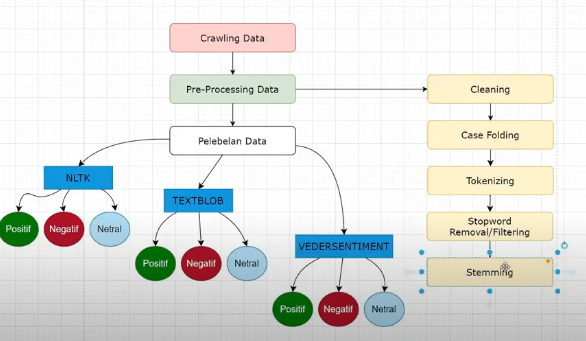

# IMPORT LIBRARY

In [ ]:
#masukan modul yang dibutuhkan
import pandas as pd
import numpy as np
import nltk
import string
import re

# LOAD DATASET

In [ ]:
#masukan data kembali yang akan diproses
def load_data():
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/skripsi/LionAirNew.csv')
    return df

df = load_data()
df.head()

,URL,Date,Tweet,ID,Replies,Retweets,Likes,Quotes,Conv. ID,Language,Links,Media,Retweeted Tweet,Bookmarks,Username
0,https://twitter.com/ToyotaAvanzaa/status/15360...,2022-06-12 21:14:52+00:00,@shabrinaasekar @worksfess Yang lion air digho...,1536094709222805504,2,0,0,0,1535857107110531073,in,NaN,https://pbs.twimg.com/media/FVFN_0SUEAEkTIF?fo...,NaN,0,ToyotaAvanzaa
1,https://twitter.com/zzzshb/status/153607249691...,2022-06-12 19:46:36+00:00,@ToyotaAvanzaa @worksfess Aku salfok sama PTny...,1536072496918974464,1,0,0,0,1535857107110531073,in,NaN,NaN,NaN,0,zzzshb
2,https://twitter.com/RirinMarinasari/status/153...,2022-06-12 19:05:16+00:00,"Kalau nyari yg cantik, ada raline syah yg bisa...",1536062095594496000,0,0,0,0,1536062095594496000,in,NaN,NaN,NaN,0,RirinMarinasari
3,https://twitter.com/Pradipta_MD11/status/15360...,2022-06-12 16:01:25+00:00,Seru juga liat orang orang debat soal pelayana...,1536015828113846274,0,0,0,0,1536015828113846274,in,NaN,NaN,NaN,0,Pradipta_MD11
4,https://twitter.com/jekeyyyhee/status/15359961...,2022-06-12 14:43:05+00:00,@frnsscls @tanyakanrl ngetawain lion air sampe...,1535996112414224386,0,0,0,0,1535929923553984512,in,NaN,NaN,NaN,0,jekeyyyhee


In [ ]:
df.shape

(2000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL              2000 non-null   object 
 1   Date             2000 non-null   object 
 2   Tweet            2000 non-null   object 
 3   ID               2000 non-null   int64  
 4   Replies          2000 non-null   int64  
 5   Retweets         2000 non-null   int64  
 6   Likes            2000 non-null   int64  
 7   Quotes           2000 non-null   int64  
 8   Conv. ID         2000 non-null   int64  
 9   Language         2000 non-null   object 
 10  Links            923 non-null    object 
 11  Media            189 non-null    object 
 12  Retweeted Tweet  0 non-null      float64
 13  Bookmarks        2000 non-null   int64  
 14  Username         2000 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 234.5+ KB


# PREPROCESSING

In [ ]:
df = pd.DataFrame(df)

# Daftar kolom yang ingin dihapus
columns_to_drop = [
    'URL', 'Date',	'ID',	'Replies', 'Retweets',	'Likes',	'Quotes',	'Conv. ID',	'Language', 'Links',	'Media',	'Retweeted Tweet',	'Bookmarks',	'Username'
]

# Menghapus kolom-kolom tersebut dari DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Menampilkan DataFrame yang dihasilkan
print(df)

                                                  Tweet
0     @shabrinaasekar @worksfess Yang lion air digho...
1     @ToyotaAvanzaa @worksfess Aku salfok sama PTny...
2     Kalau nyari yg cantik, ada raline syah yg bisa...
3     Seru juga liat orang orang debat soal pelayana...
4     @frnsscls @tanyakanrl ngetawain lion air sampe...
...                                                 ...
1995  @okinrz @ardezzo @indoflyer Berarti udah ke 3x...
1996  7 Keuntungan Terbang dengan Maskapai Lion Air ...
1997  @tutudetoxic @TxtdariHI kemaren sempet liat ai...
1998  @dimipraaa Klo dari berita yang gue baca ini y...
1999  @reremifasolasi ini boeing 737 yang sama kayak...

[2000 rows x 1 columns]


In [ ]:
#simpan kedalam csv
df.to_csv('tweet_lion.csv', sep=',', index=True)

In [ ]:
data = pd.read_csv('/content/tweet_lion.csv')
data.head()

,Unnamed: 0,Tweet
0,0,@shabrinaasekar @worksfess Yang lion air digho...
1,1,@ToyotaAvanzaa @worksfess Aku salfok sama PTny...
2,2,"Kalau nyari yg cantik, ada raline syah yg bisa..."
3,3,Seru juga liat orang orang debat soal pelayana...
4,4,@frnsscls @tanyakanrl ngetawain lion air sampe...


#Translate

In [ ]:
!pip3 install googletrans==3.1.0a0

In [ ]:
#!pip install googletrans==4.0.0-rc1

In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
data = pd.DataFrame(data)

# Daftar kolom yang ingin dihapus
columns_to_drop = [
    'Unnamed: 0'
]

# Menghapus kolom-kolom tersebut dari DataFrame
data.drop(columns=columns_to_drop, inplace=True)

# Menampilkan DataFrame yang dihasilkan
print(data)

                                                  Tweet
0     @shabrinaasekar @worksfess Yang lion air digho...
1     @ToyotaAvanzaa @worksfess Aku salfok sama PTny...
2     Kalau nyari yg cantik, ada raline syah yg bisa...
3     Seru juga liat orang orang debat soal pelayana...
4     @frnsscls @tanyakanrl ngetawain lion air sampe...
...                                                 ...
1995  @okinrz @ardezzo @indoflyer Berarti udah ke 3x...
1996  7 Keuntungan Terbang dengan Maskapai Lion Air ...
1997  @tutudetoxic @TxtdariHI kemaren sempet liat ai...
1998  @dimipraaa Klo dari berita yang gue baca ini y...
1999  @reremifasolasi ini boeing 737 yang sama kayak...

[2000 rows x 1 columns]


In [ ]:
data.head()

,Tweet
0,@shabrinaasekar @worksfess Yang lion air digho...
1,@ToyotaAvanzaa @worksfess Aku salfok sama PTny...
2,"Kalau nyari yg cantik, ada raline syah yg bisa..."
3,Seru juga liat orang orang debat soal pelayana...
4,@frnsscls @tanyakanrl ngetawain lion air sampe...


In [ ]:
#cleaning
def cleaning(data):
    data = re.sub(r'\$\w*', '', str(data))         #digunakan untuk menghapus semua kata yang dimulai dengan tanda dolar ($) dan diikuti oleh karakter huruf, angka, atau garis bawah.      #
    data = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', data)     #untuk menghapus semua URL atau tautan web dari teks.
    data = re.sub('&quot;'," ", data)         #Digunakan untuk menggantikan setiap kemunculan `&quot;` dengan spasi kosong dalam kolom `data`.
    data = re.sub(r"\d+", " ", str(data))         #digunakan untuk menggantikan semua angka dalam teks yang disimpan dalam kolom `data` dengan spasi kosong.
    data = re.sub(r"\b[a-zA-Z]\b", "", str(data))     #digunakan untuk menghapus semua kata tunggal dalam teks yang disimpan dalam kolom `data`.
    data = re.sub(r"[^\w\s]", " ", str(data))         #digunakan untuk menggantikan semua karakter non-alphanumerik dan non-spasi dalam teks yang disimpan dalam variabel `content` dengan spasi kosong.
    data = re.sub(r'(.)\1+', r'\1\1', data)         #Digunakan untuk mengganti dua atau lebih karakter berulang dalam teks dengan hanya dua karakter yang berulang. Misalnya, jika terdapat karakter berulang "eeeee" dalam teks, maka akan digantikan dengan "ee".
    data = re.sub(r"\s+", " ", str(data))       #digunakan untuk menggantikan satu atau lebih spasi berturut-turut dalam teks
    data = re.sub(r'#', '', data)         #digunakan untuk menghapus semua tanda pagar (#) dalam teks
    data = re.sub(r'[^a-zA-z0-9]', ' ', str(data))    #Digunakan untuk menggantikan semua karakter non-alphanumerik dalam teks dengan spasi kosong, sehingga menghapus karakter-karakter tersebut dari teks dan mempertahankan hanya huruf (kapital dan kecil) serta angka.
    data = re.sub(r'\b\w{1,2}\b', '', data)     #digunakan untuk menghapus kata-kata dengan panjang satu atau dua karakter dalam teks
    data = re.sub(r'\s\s+', ' ', data)      #Digunakan untuk menggantikan dua atau lebih spasi berturut-turut dalam teks dengan satu spasi tunggal.
    data = re.sub(r'^RT[\s]+', '', data)        #menghapus RT
    data = re.sub(r'^b[\s]+', '', data)       #digunakan untuk menghapus spasi di awal teks
    data = re.sub(r'^link[\s]+', '', data)      #digunakan untuk menghapus string "link" yang diikuti oleh spasi di awal teks
    return data

def remove_emoji(data):
    emoji = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                        u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                        u"\U0001F1E0-\U0001F1FF"  # bendera negara
                        u"\U00002702-\U000027B0"  # simbol
                        u"\U000024C2-\U0001F251"  # emoji lainnya
                        "]+", flags=re.UNICODE)
    return emoji.sub(r'', data)

data['Tweet'] = data['Tweet'].apply(cleaning)
data.head()

,Tweet
0,shabrinaasekar worksfess Yang lion air dighos...
1,ToyotaAvanzaa worksfess Aku salfok sama PTnya...
2,Kalau nyari cantik ada raline syah bisa dibaha...
3,Seru juga liat orang orang debat soal pelayana...
4,frnsscls tanyakanrl ngetawain lion air sampe ...


In [ ]:
translator = Translator()

translations = {}
for column in data.columns:
    unique_elements = data[column].unique()
    for element in unique_elements:
        translations[element] = translator.translate(element).text
translations

{' shabrinaasekar worksfess Yang lion air dighosting kak sampe sekarang gaada kejelasan lebih lanjut ': 'shabrinaasekar worksfess That Lion Air was ghosted, bro, until now there is no further clarity',
 ' ToyotaAvanzaa worksfess Aku salfok sama PTnya keren bisa nembus HPM Lion Air': "Toyota Avanza worksfess I'm looking for cool PT to penetrate Lion Air's HPM",
 'Kalau nyari cantik ada raline syah bisa dibahas single lagi Kalau mau nyari kaya ada raline pimpinan lion air Kalau mau nyari suara bagus ada Lyodra bisa diact kenal lagi Ngapain coba kalau bukan cari aman Karena perihal Kita mainnya delete akun yang': "If you're looking for beauty, there's Raline Syah, you can talk about being single again. If you want to look for wealth, there's Raline, the leader of Lion Air. If you want to look for a good voice, there's Lyodra. You can act. You can meet me again. Why try it if you're not looking for safety? Because of the problem we're playing, delete that account.",
 'Seru juga liat orang 

In [ ]:
data['tweet_eng'] = data['Tweet'].replace(translations)
data.head()

,Tweet,tweet_eng
0,shabrinaasekar worksfess Yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...
1,ToyotaAvanzaa worksfess Aku salfok sama PTnya...,Toyota Avanza worksfess I'm looking for cool P...
2,Kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S..."
3,Seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...


In [ ]:
#simpan kedalam csv
data.to_csv('clean_eng.csv', sep=',', index=True)

In [ ]:
import pandas as pd

data = pd.read_csv('/content/clean_eng.csv')
data.head()

,Unnamed: 0,Tweet,tweet_eng
0,0,shabrinaasekar worksfess Yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...
1,1,ToyotaAvanzaa worksfess Aku salfok sama PTnya...,Toyota Avanza worksfess I'm looking for cool P...
2,2,Kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S..."
3,3,Seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...
4,4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...


In [ ]:
data = pd.DataFrame(data)

# Daftar kolom yang ingin dihapus
columns_to_drop = [
    'Unnamed: 0'
]

# Menghapus kolom-kolom tersebut dari DataFrame
data.drop(columns=columns_to_drop, inplace=True)

# Menampilkan DataFrame yang dihasilkan
print(data)

                                                  Tweet  \
0      shabrinaasekar worksfess Yang lion air dighos...   
1      ToyotaAvanzaa worksfess Aku salfok sama PTnya...   
2     Kalau nyari cantik ada raline syah bisa dibaha...   
3     Seru juga liat orang orang debat soal pelayana...   
4      frnsscls tanyakanrl ngetawain lion air sampe ...   
...                                                 ...   
1995   okinrz ardezzo indoflyer Berarti udah sama li...   
1996       Keuntungan Terbang dengan Maskapai Lion Air    
1997   tutudetoxic TxtdariHI kemaren sempet liat air...   
1998   dimipraa Klo dari berita yang gue baca ini ya...   
1999   reremifasolasi ini boeing yang sama kayak lio...   

                                              tweet_eng  
0     shabrinaasekar worksfess That Lion Air was gho...  
1     Toyota Avanza worksfess I'm looking for cool P...  
2     If you're looking for beauty, there's Raline S...  
3     It's also fun to see people debating about LCC...  
4

* cleaning data
* case folding
* tokenisasi
* stopword removal
* stemming
* hapus [] stemming
* remove duplikat

## cleaning data

In [ ]:
data.head()

,Tweet,tweet_eng
0,shabrinaasekar worksfess Yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...
1,ToyotaAvanzaa worksfess Aku salfok sama PTnya...,Toyota Avanza worksfess I'm looking for cool P...
2,Kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S..."
3,Seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...


In [ ]:
data.shape

(2000, 2)

In [ ]:
data.dropna(inplace=True)
data.head()

,Tweet,tweet_eng
0,shabrinaasekar worksfess Yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...
1,ToyotaAvanzaa worksfess Aku salfok sama PTnya...,Toyota Avanza worksfess I'm looking for cool P...
2,Kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S..."
3,Seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...


In [ ]:
#case folding - ubah jadi huruf kecil
data['Tweet'] = data['Tweet'].str.lower()
data.head()

,Tweet,tweet_eng
0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...
1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...
2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S..."
3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...


In [ ]:
#simpan kedalam csv
data.to_csv('datalower.csv', sep=',', index=True)

## tokenisasi

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#tokenisasi - membagi kalimat jadi perkata (dipisah)
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(data):
    return word_tokenize(data)

data['final'] = data['Tweet'].apply(lambda x: word_tokenize_wrapper(x.lower()))
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Tweet,tweet_eng,final
0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,"[shabrinaasekar, worksfess, yang, lion, air, d..."
1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,"[toyotaavanzaa, worksfess, aku, salfok, sama, ..."
2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S...","[kalau, nyari, cantik, ada, raline, syah, bisa..."
3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...,"[seru, juga, liat, orang, orang, debat, soal, ..."
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...,"[frnsscls, tanyakanrl, ngetawain, lion, air, s..."


## stopword removal

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [ ]:
#data.tweet_eng = data.tweet_eng.apply(lemmatize_words)

In [ ]:
#stopword removal - menghapus kata sesuai dengan kamus indonesia
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'gt', 'klo',
                       'kalo', 'amp', 'biar', 'xad', 'xef',
                       'gak', 'xbc', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'xae', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&', 'yah', 'no', 'je', 'xbb', 'xb', 'sch',
                       'injirrr', 'ah', 'oena', 'bu', 'eh', 'xac', 'anjir']) #tambahan kata

list_stopwords = set(list_stopwords)

def stopwords_removal(data):
  return [word for word in data if word not in list_stopwords]

data['final'] = data['final'].apply(stopwords_removal)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,tweet_eng,final
0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,"[shabrinaasekar, worksfess, lion, air, dighost..."
1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,"[toyotaavanzaa, worksfess, salfok, ptnya, kere..."
2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S...","[nyari, cantik, raline, syah, dibahas, single,..."
3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...,"[seru, liat, orang, orang, debat, pelayanan, m..."
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...,"[frnsscls, tanyakanrl, ngetawain, lion, air, s..."


In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

data['final'] = data['final'].apply(lambda x: ' '.join(stem_text(x)))
data.head()

,Tweet,tweet_eng,final
0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...
1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...
2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S...",nyari cantik raline syah bahas single nyari ka...
3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...,seru liat orang orang debat layan maskapai lcc...
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...,frnsscls tanyakanrl ngetawain lion air sampe b...


In [ ]:
# Hapus baris dengan nilai-nilai NaN
data.dropna(inplace=True)

## remove duplikat

In [ ]:
#remove kalimat duplikat dari kolom stemming
#data.drop_dupl icates(subset = "Tweet", keep = 'first', inplace = True)
data.head()

,Tweet,tweet_eng,final
0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...
1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...
2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S...",nyari cantik raline syah bahas single nyari ka...
3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...,seru liat orang orang debat layan maskapai lcc...
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...,frnsscls tanyakanrl ngetawain lion air sampe b...


In [ ]:
data.shape

(2000, 3)

In [ ]:
#simpan kedalam csv
data.to_csv('skripsifix.csv', sep=',', index=True) #mulai sini

In [ ]:
import pandas as pd
data = pd.read_csv('/content/skripsifix.csv')
data.head()

,Unnamed: 0,Tweet,tweet_eng,final
0,0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...
1,1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...
2,2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S...",nyari cantik raline syah bahas single nyari ka...
3,3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...,seru liat orang orang debat layan maskapai lcc...
4,4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...,frnsscls tanyakanrl ngetawain lion air sampe b...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   Tweet       2000 non-null   object
 2   tweet_eng   2000 non-null   object
 3   final       2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [ ]:
data = pd.DataFrame(data)

# Daftar kolom yang ingin dihapus
columns_to_drop = [
    'Unnamed: 0'
]

# Menghapus kolom-kolom tersebut dari DataFrame
data.drop(columns=columns_to_drop, inplace=True)

# Menampilkan DataFrame yang dihasilkan
print(data)

                                                  Tweet  \
0      shabrinaasekar worksfess yang lion air dighos...   
1      toyotaavanzaa worksfess aku salfok sama ptnya...   
2     kalau nyari cantik ada raline syah bisa dibaha...   
3     seru juga liat orang orang debat soal pelayana...   
4      frnsscls tanyakanrl ngetawain lion air sampe ...   
...                                                 ...   
1995   okinrz ardezzo indoflyer berarti udah sama li...   
1996       keuntungan terbang dengan maskapai lion air    
1997   tutudetoxic txtdarihi kemaren sempet liat air...   
1998   dimipraa klo dari berita yang gue baca ini ya...   
1999   reremifasolasi ini boeing yang sama kayak lio...   

                                              tweet_eng  \
0     shabrinaasekar worksfess That Lion Air was gho...   
1     Toyota Avanza worksfess I'm looking for cool P...   
2     If you're looking for beauty, there's Raline S...   
3     It's also fun to see people debating about LCC...

# LABELLING DATA

## translate dataset

In [ ]:
#data.replace(translations, inplace = True)
#data.head()

##textblob

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
import pandas as pd


# Initialize empty lists for labels and scores
labels = []
scores = []

# Iterate over each text in the 'stemming_data' column
for text in data['tweet_eng']:
    # Get sentiment scores using SentimentIntensityAnalyzer
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Assign sentiment label based on compound score
    if polarity > 0.05:
        label = 'Positive'
    elif polarity < -0.05:
        label = 'Negative'
    else:
        label = 'Neutral'

    scores.append(polarity)
    labels.append(label)

# Add 'sentiment_score' and 'sentiment' columns to the DataFrame\
data['sentiments'] = labels
data['sentiment_score'] = scores


# Select the desired columns and display the head of the DataFrame
data = data[['Tweet', 'tweet_eng','final', 'sentiment_score', 'sentiments']]
data.tail()

,Tweet,tweet_eng,final,sentiment_score,sentiments
1995,okinrz ardezzo indoflyer berarti udah sama li...,okin arezzo indoflyer That means it's already ...,okinrz ardezzo indoflyer udah lion air beneran...,0.35,Positive
1996,keuntungan terbang dengan maskapai lion air,Benefits of Flying with Lion Air,untung terbang maskapai lion air,0.00,Neutral
1997,tutudetoxic txtdarihi kemaren sempet liat air...,tutudetoxic TxtdariHI yesterday I saw Disney's...,tutudetoxic txtdarihi kemaren sempet liat air ...,0.20,Positive
1998,dimipraa klo dari berita yang gue baca ini ya...,"dimipraa If from the news I read, the Boeing L...",dimipraa berita gue baca crash boeing lion air...,0.00,Neutral
1999,reremifasolasi ini boeing yang sama kayak lio...,doremifasolasido is the same Boeing as Lion Ai...,reremifasolasi boeing kayak lion air silam,0.00,Neutral


<ipython-input-45-88805f35210e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


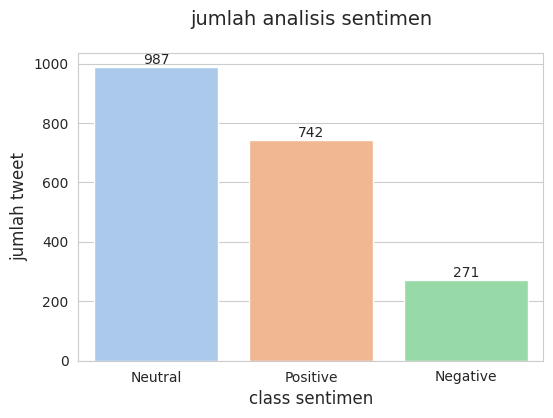

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sentiment_count = data['sentiments'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('jumlah analisis sentimen', fontsize=14, pad=20)
plt.xlabel('class sentimen',fontsize=12)
plt.ylabel('jumlah tweet', fontsize= 12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')
plt.show()

<ipython-input-47-7faa1afc8801>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


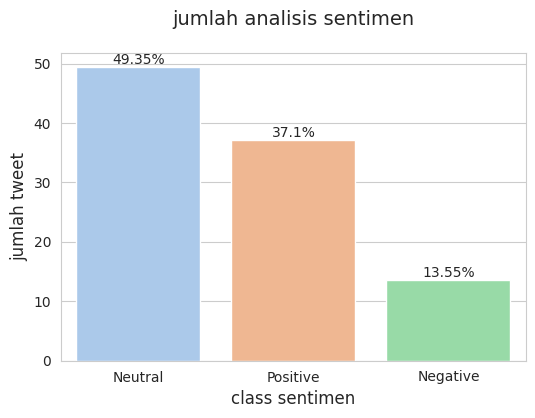

In [ ]:
# prompt: change to percentage fig, ax = plt.subplots(figsize=(6, 4))
# ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
# plt.title('jumlah analisis sentimen', fontsize=14, pad=20)
# plt.xlabel('class sentimen',fontsize=12)
# plt.ylabel('jumlah tweet', fontsize= 12)
# for i, count in enumerate(sentiment_count.values):
#     ax.text(i, count+0.10, str(count), ha='center', va='botto

sentiment_count = data['sentiments'].value_counts() * 100 / len(data)

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('jumlah analisis sentimen', fontsize=14, pad=20)
plt.xlabel('class sentimen',fontsize=12)
plt.ylabel('jumlah tweet', fontsize= 12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(round(count, 2)) + '%', ha='center', va='bottom')
plt.show()


In [ ]:
#simpan kedalam csv
data.to_csv('labelskripsi.csv', sep=',', index=True)

In [ ]:
#simpan kedalam csv
data.to_csv('labeltextblob.csv', sep=',', index=True)

## labelling vader

In [ ]:
# Install and import nltk
!pip install nltk
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
!pip install VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
#scores = [analyser.polarity_scores(x) for x in df['stemming_data']]
#df['Compound_Score'] - [x['compound'] for  x in scores]

#df.head()

# Assuming df is your DataFrame with 'stemming_data' column

# Calculate sentiment scores for each text using SentimentIntensityAnalyzer
scores = [analyser.polarity_scores(x) for x in data['tweet_eng']]

# Extract compound scores from the scores list
compound_scores = [x['compound'] for x in scores]

# Assign compound scores to the 'Compound_Score' column in the DataFrame
data['Compound_Score'] = compound_scores

# Display the updated DataFrame
data.head()


,Tweet,tweet_eng,final,sentiment_score,sentiments,Compound_Score
0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...,0.000000,Neutral,-0.5358
1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...,0.350000,Positive,0.3182
2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S...",nyari cantik raline syah bahas single nyari ka...,0.314286,Positive,0.8057
3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...,seru liat orang orang debat layan maskapai lcc...,0.150000,Positive,0.5106
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...,frnsscls tanyakanrl ngetawain lion air sampe b...,0.037500,Neutral,-0.0516


In [ ]:
data.loc[data['Compound_Score'] < 0, 'Sentiments'] = 'Negative'
data.loc[data['Compound_Score'] == 0, 'Sentiments'] = 'Neutral'
data.loc[data['Compound_Score'] > 0, 'Sentiments'] = 'Positive'

data.head()

,Tweet,tweet_eng,final,sentiment_score,sentiments,Compound_Score,Sentiments
0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...,0.000000,Neutral,-0.5358,Negative
1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...,0.350000,Positive,0.3182,Positive
2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S...",nyari cantik raline syah bahas single nyari ka...,0.314286,Positive,0.8057,Positive
3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...,seru liat orang orang debat layan maskapai lcc...,0.150000,Positive,0.5106,Positive
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...,frnsscls tanyakanrl ngetawain lion air sampe b...,0.037500,Neutral,-0.0516,Negative


<ipython-input-52-5a57d1a5fe50>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


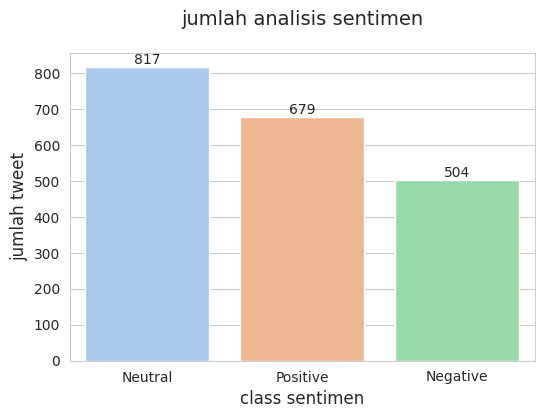

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sentiment_count = data['Sentiments'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('jumlah analisis sentimen', fontsize=14, pad=20)
plt.xlabel('class sentimen',fontsize=12)
plt.ylabel('jumlah tweet', fontsize= 12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')
plt.show()

In [ ]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet_eng"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet_eng"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet_eng"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["tweet_eng"]]
data.head()

,Tweet,tweet_eng,final,sentiment_score,sentiments,Compound_Score,Sentiments,Positive,Negative,Neutral,Compound
0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...,0.000000,Neutral,-0.5358,Negative,0.000,0.255,0.745,-0.5358
1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...,0.350000,Positive,0.3182,Positive,0.161,0.000,0.839,0.3182
2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S...",nyari cantik raline syah bahas single nyari ka...,0.314286,Positive,0.8057,Positive,0.185,0.065,0.750,0.8057
3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...,seru liat orang orang debat layan maskapai lcc...,0.150000,Positive,0.5106,Positive,0.191,0.000,0.809,0.5106
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...,frnsscls tanyakanrl ngetawain lion air sampe b...,0.037500,Neutral,-0.0516,Negative,0.211,0.225,0.563,-0.0516


In [ ]:
#simpan kedalam csv
data.to_csv('labelvader.csv', sep=',', index=True)

In [ ]:
#score = data["Compound"].values
#sentiment = []
#for i in score:
#    if i >= 0.05 :
#        sentiment.append('Positive')
#    elif i <= -0.05 :
#        sentiment.append('Positive')
#    else:
#        sentiment.append('Neutral')
#data["Sentiment"] = sentiment
#data.head()

,Tweet,tweet_eng,final,Positive,Negative,Neutral,Compound,Sentiment
0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...,0.151,0.123,0.726,0.1280,Positive
1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...,0.161,0.000,0.839,0.3182,Positive
2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline, ...",nyari cantik raline syah bahas single nyari ka...,0.179,0.042,0.779,0.8209,Positive
3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about the...,seru liat orang orang debat layan maskapai lcc...,0.171,0.000,0.829,0.5106,Positive
4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls ask me to laugh at the water lion unt...,frnsscls tanyakanrl ngetawain lion air sampe b...,0.229,0.197,0.573,0.1280,Positive


resampling

# VISUALIZATION

In [ ]:
import pandas as pd
data = pd.read_csv('/content/labelvader.csv')
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/skripsi/skripsi file/skripsiclean.csv')
data.head()

,Unnamed: 0,Tweet,tweet_eng,final,sentiment_score,sentiments,Compound_Score,Sentiments,Positive,Negative,Neutral,Compound
0,0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...,0.000000,Neutral,-0.5358,Negative,0.000,0.255,0.745,-0.5358
1,1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...,0.350000,Positive,0.3182,Positive,0.161,0.000,0.839,0.3182
2,2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline S...",nyari cantik raline syah bahas single nyari ka...,0.314286,Positive,0.8057,Positive,0.185,0.065,0.750,0.8057
3,3,seru juga liat orang orang debat soal pelayana...,It's also fun to see people debating about LCC...,seru liat orang orang debat layan maskapai lcc...,0.150000,Positive,0.5106,Positive,0.191,0.000,0.809,0.5106
4,4,frnsscls tanyakanrl ngetawain lion air sampe ...,frnsscls tanyarl laughed at Lion Air until he ...,frnsscls tanyakanrl ngetawain lion air sampe b...,0.037500,Neutral,-0.0516,Negative,0.211,0.225,0.563,-0.0516


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## most positive tweets

In [ ]:
def generate_wordcloud(Tweet):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(Tweet)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

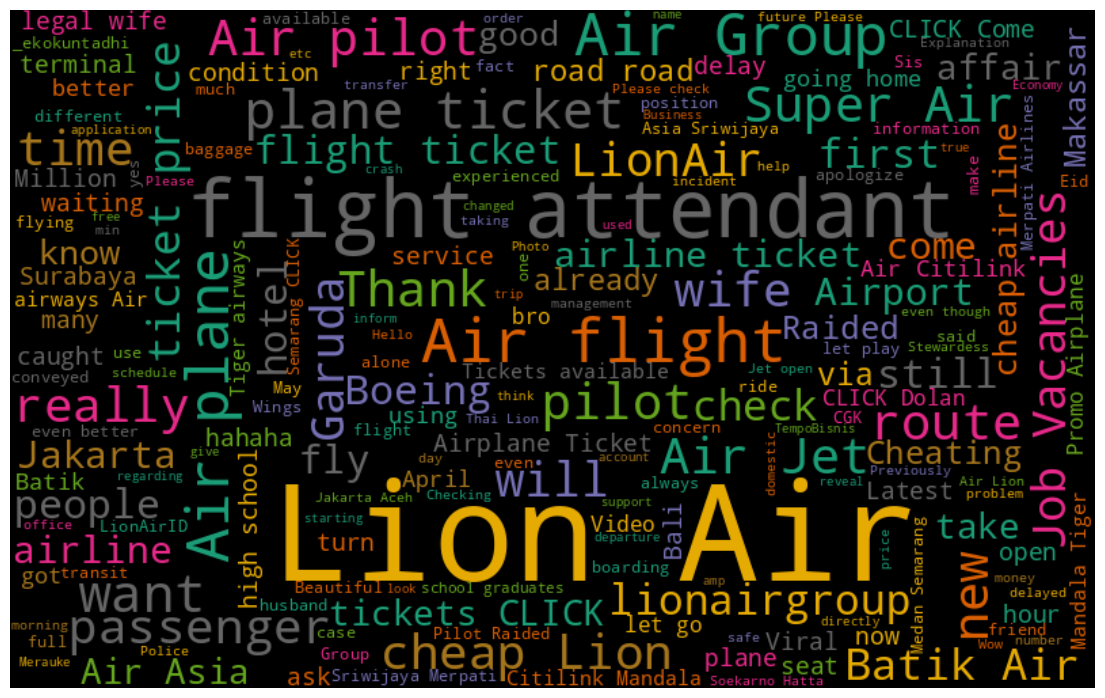

In [ ]:
Tweet = ' '.join([text for text in data['tweet_eng'][data.sentiments == 'Positive']])
generate_wordcloud(Tweet)

## most negative tweets

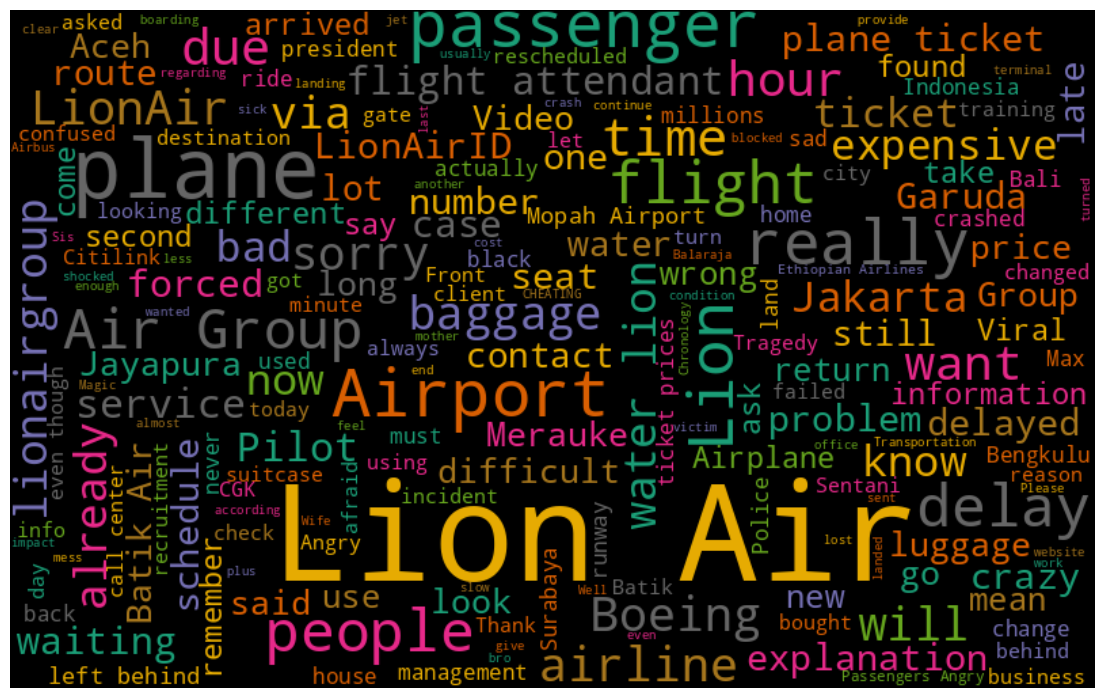

In [ ]:
Tweet = ' '.join([text for text in data['tweet_eng'][data.sentiments == 'Negative']])
generate_wordcloud(Tweet)

## most neutral tweets

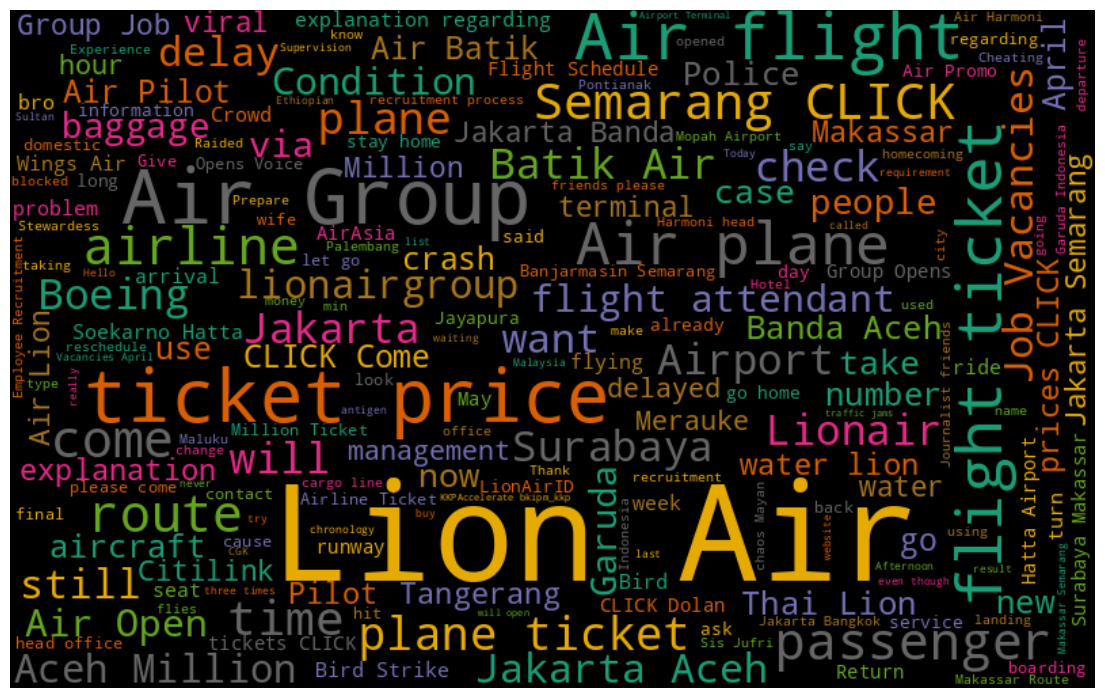

In [ ]:
Tweet = ' '.join([text for text in data['tweet_eng'][data.sentiments == 'Neutral']])
generate_wordcloud(Tweet)

#klasifikasi label nb dan svm

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/labelskripsi.csv')
dataset.head(2)

,Unnamed: 0,Tweet,tweet_eng,final,sentiment_score,sentiments
0,0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...,0.00,Neutral
1,1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...,0.35,Positive


In [ ]:
dataset = pd.DataFrame(dataset)

# Daftar kolom yang ingin dihapus
columns_to_drop = [
    'Unnamed: 0', 'Tweet', 'final', 'sentiment_score'
]

# Menghapus kolom-kolom tersebut dari DataFrame
dataset.drop(columns=columns_to_drop, inplace=True)

# Menampilkan DataFrame yang dihasilkan
print(dataset)

                                              tweet_eng sentiments
0     shabrinaasekar worksfess That Lion Air was gho...    Neutral
1     Toyota Avanza worksfess I'm looking for cool P...   Positive
2     If you're looking for beauty, there's Raline, ...   Positive
3     It's also fun to see people debating about the...   Positive
4     frnsscls ask me to laugh at the water lion unt...   Positive
...                                                 ...        ...
1995  okin arezzo indoflyer That means it's already ...   Positive
1996                   Benefits of Flying with Lion Air    Neutral
1997  tutudetoxic TxtdariHI yesterday I saw Disney's...   Positive
1998  Dimipraa Klo from the news I read that the Boe...    Neutral
1999  doremifasolasido is the same Boeing as Lion Ai...    Neutral

[2000 rows x 2 columns]


In [ ]:
!pip install scikit-learn
from sklearn import metrics

In [ ]:
import random
set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if (n[1] == 'Positive'):
      set_positif.append(n)
    elif (n[1] == 'Negative'):
      set_negatif.append(n)
    else:
      set_netral.append(n)
set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral
train_set = []
for row in train:
    train_set.append(n)


In [ ]:
import random
from textblob.classifiers import NaiveBayesClassifier

set_positif = []
set_negatif = []
set_netral = []

# Iterate over the rows of the DataFrame using iterrows()
for index, row in dataset.iterrows():
    # Access the 'sentiments' column of the current row
    if row['sentiments'] == 'Positive':
        set_positif.append(row)
    elif row['sentiments'] == 'Negative':
        set_negatif.append(row)
    else:
        set_netral.append(row)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []
for row in train:
    # Append the 'tweet_eng' and 'sentiments' columns as a tuple
    train_set.append((row['tweet_eng'], row['sentiments'])) # Changed from n to row

# Create the NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)

# Prepare the test data in the correct format
test_set = [(row['tweet_eng'], row['sentiments']) for _, row in dataset.iterrows()]

# Calculate and print the accuracy
print(cl.accuracy(test_set)) # Changed from data to test_set

0.765


In [ ]:
data_tweet = list(data['tweet_eng'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positive':
        total_positif += 1
    elif analysis.classify() == 'Negative':
        total_negatif += 1
    else:
        total_netral += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis NB:\nPositive= {total_positif}\nNegative = {total_negatif}\nNeutral = {total_netral}')
print(f'\nTotal : {total}')


Hasil Analisis NB:
Positive= 633
Negative = 150
Neutral = 1217

Total : 2000


In [ ]:
status = pd.DataFrame({'naive_bayes':status})
dataset['naive_bayes'] = status
dataset.head()

,tweet_eng,sentiments,naive_bayes
0,shabrinaasekar worksfess That Lion Air was gho...,Neutral,Neutral
1,Toyota Avanza worksfess I'm looking for cool P...,Positive,Neutral
2,"If you're looking for beauty, there's Raline, ...",Positive,Negative
3,It's also fun to see people debating about the...,Positive,Positive
4,frnsscls ask me to laugh at the water lion unt...,Positive,Positive


In [ ]:
print(metrics.classification_report(dataset['sentiments'], dataset['naive_bayes']))

              precision    recall  f1-score   support

    Negative       0.75      0.42      0.54       272
     Neutral       0.73      0.91      0.81       975
    Positive       0.84      0.71      0.77       753

    accuracy                           0.77      2000
   macro avg       0.77      0.68      0.70      2000
weighted avg       0.77      0.77      0.76      2000



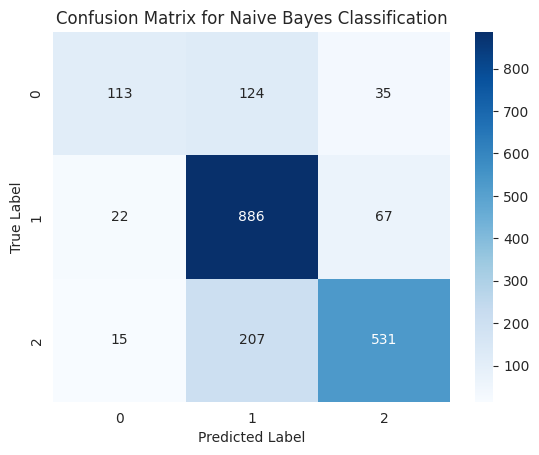

In [ ]:
# prompt: buat visualisasi conf matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(dataset['sentiments'], dataset['naive_bayes'])

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes Classification')

# Display the plot
plt.show()


In [ ]:
import random
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from textblob import TextBlob


# Separate data into different sentiment sets
set_positif = []
set_negatif = []
set_netral = []

for index, row in dataset.iterrows():
    if row['sentiments'] == 'Positive':
        set_positif.append(row)
    elif row['sentiments'] == 'Negative':
        set_negatif.append(row)
    else:
        set_netral.append(row)

# Sample half of each sentiment set
set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

# Combine the sets for training
train = set_positif + set_negatif + set_netral

# Prepare the training set
train_set = [(row['tweet_eng'], row['sentiments']) for row in train]

# Prepare the test data
test_set = [(row['tweet_eng'], row['sentiments']) for _, row in dataset.iterrows()]

# Extract features and labels
X_train = [text for text, label in train_set]
y_train = [label for text, label in train_set]
X_test = [text for text, label in test_set]
y_test = [label for text, label in test_set]

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train an SVM classifier
svm = SVC(probability=True)
svm.fit(X_train_counts, y_train)

# Make predictions and calculate accuracy
y_pred = svm.predict(X_test_counts)
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

# Define a custom SVM TextBlob classifier
class SVMClassifier:
    def __init__(self, train_set):
        self.train_set = train_set
        self.vectorizer = CountVectorizer()
        self.svm = SVC(probability=True)
        self._train()

    def _train(self):
        X = [x[0] for x in self.train_set]
        y = [x[1] for x in self.train_set]
        X_counts = self.vectorizer.fit_transform(X)
        self.svm.fit(X_counts, y)

    def classify(self, text):
        X_counts = self.vectorizer.transform([text])
        return self.svm.predict(X_counts)[0]

    def prob_classify(self, text):
        X_counts = self.vectorizer.transform([text])
        prob_dist = self.svm.predict_proba(X_counts)[0]
        return {label: prob for label, prob in zip(self.svm.classes_, prob_dist)}

# Create the custom SVM classifier
svm_classifier = SVMClassifier(train_set)

# Use the custom classifier with TextBlob
def classify_with_svm(text, classifier):
    return classifier.classify(text)

# Example usage
text_to_classify = "Your text here"
classification_result = classify_with_svm(text_to_classify, svm_classifier)
print(classification_result)

# Count the positive, negative, and neutral sentiments
total_positive = sum(1 for sentiment in y_test if sentiment == 'Positive')
total_negative = sum(1 for sentiment in y_test if sentiment == 'Negative')
total_neutral = sum(1 for sentiment in y_test if sentiment == 'Neutral')

print(f'Total Positive: {total_positive}')
print(f'Total Negative: {total_negative}')
print(f'Total Neutral: {total_neutral}')


SVM Accuracy: 78.00%
Neutral
Total Positive: 753
Total Negative: 272
Total Neutral: 975


In [ ]:
# Add predictions as a new column in the dataset
dataset['svm'] = dataset['tweet_eng'].apply(lambda text: classify_with_svm(text, svm_classifier))
dataset.tail(7)

,tweet_eng,sentiments,naive_bayes,svm
1993,"Specchless, every time I hear the news of a pl...",Negative,Negative,Negative
1994,Hanifan Assumco Design The Lion Air Falls Wate...,Neutral,Neutral,Neutral
1995,okin arezzo indoflyer That means it's already ...,Positive,Positive,Neutral
1996,Benefits of Flying with Lion Air,Neutral,Neutral,Neutral
1997,tutudetoxic TxtdariHI yesterday I saw Disney's...,Positive,Positive,Positive
1998,Dimipraa Klo from the news I read that the Boe...,Neutral,Neutral,Neutral
1999,doremifasolasido is the same Boeing as Lion Ai...,Neutral,Neutral,Neutral


In [ ]:
#simpan kedalam csv
dataset.to_csv('labelperbandingan.csv', sep=',', index=True)

In [ ]:
print(metrics.classification_report(dataset['sentiments'], dataset['svm']))

              precision    recall  f1-score   support

    Negative       1.00      0.33      0.49       272
     Neutral       0.76      0.92      0.83       975
    Positive       0.80      0.77      0.78       753

    accuracy                           0.78      2000
   macro avg       0.85      0.67      0.70      2000
weighted avg       0.80      0.78      0.77      2000



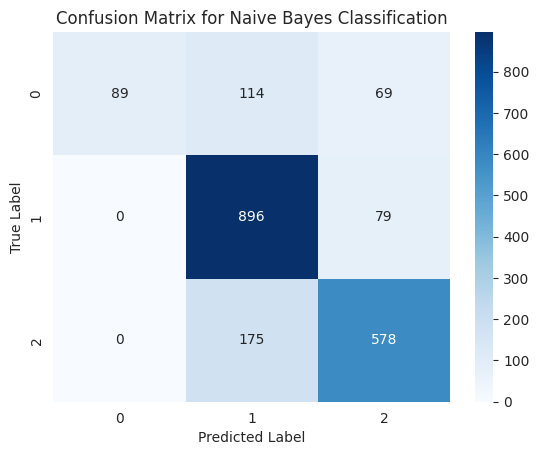

In [ ]:
# prompt: buat visualisasi conf matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(dataset['sentiments'], dataset['svm'])

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes Classification')

# Display the plot
plt.show()


#FEATURE EXTRACTION

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv('/content/labelskripsi.csv')
data.head(3)

,Unnamed: 0,Tweet,tweet_eng,final,sentiment_score,sentiments
0,0,shabrinaasekar worksfess yang lion air dighos...,shabrinaasekar worksfess That Lion Air was gho...,shabrinaasekar worksfess lion air dighosting k...,0.000000,Neutral
1,1,toyotaavanzaa worksfess aku salfok sama ptnya...,Toyota Avanza worksfess I'm looking for cool P...,toyotaavanzaa worksfess salfok ptnya keren nem...,0.350000,Positive
2,2,kalau nyari cantik ada raline syah bisa dibaha...,"If you're looking for beauty, there's Raline, ...",nyari cantik raline syah bahas single nyari ka...,0.314286,Positive


In [ ]:
print(metrics.classification_report(data['']))

In [ ]:
X = data['final']
y = data['sentiments']

In [ ]:
# Misalkan data adalah DataFrame yang berisi kolom 'text' dan 'sentiments'
texts = data['final']
labels = data['sentiments']

In [ ]:
# Ubah teks menjadi fitur numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

In [ ]:
# prompt: melihat hasil tfidfvectorizer

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF matrix
tfidf_matrix = X.toarray()

# Print the feature names and the first 5 rows of the TF-IDF matrix
print("Feature names:", feature_names)
print("\nTF-IDF matrix:")
for i in range(5):
    print(tfidf_matrix[i])


Feature names: ['aaargh' 'aamiin' 'ababa' ... 'zonauang' 'zone' 'zqhr']

TF-IDF matrix:
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

In [ ]:
# Splitting Dataset into Train and Test (Smote)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2,random_state=42)

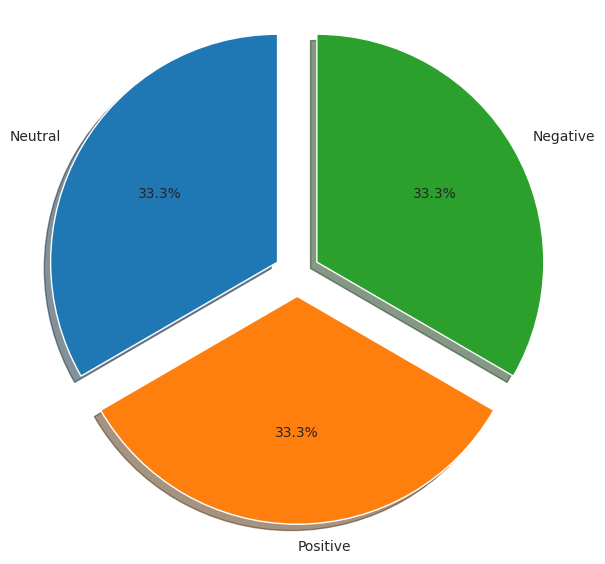

In [ ]:
# Buat pie chart untuk melihat distribusi kelas setelah SMOTE
class_counts = y_sm.value_counts()
labels = class_counts.index
sizes = class_counts.values
explode = (0.1, 0.1, 0.1)  # Sesuaikan explode sesuai kebutuhan

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Pastikan pie chart berbentuk lingkaran

plt.show()

In [ ]:
# prompt: class_counts = y_sm.value_counts() print

class_counts = y_sm.value_counts()
print(class_counts)


sentiments
Neutral     975
Positive    975
Negative    975
Name: count, dtype: int64



###modelling

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics

In [ ]:
# instantiate classifier with rbf kernel and C=100
svm=SVC(C=100.0)
svm.fit(X_train,y_train)

svm_pred=svm.predict(X_test)
accuracy_score(y_test, svm_pred)

0.8427350427350427

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
svm_prediction = svm.predict(X_test)

In [ ]:
accuracy_score(svm_prediction,y_test)

0.8444444444444444

naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nb_prediction =  nb.predict(X_test)

In [ ]:
accuracy_score(nb_prediction,y_test)

0.7401709401709402

conv matrix


In [ ]:
sv = classification_report(y_test, svm_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96       196
     Neutral       0.75      0.85      0.79       205
    Positive       0.83      0.72      0.77       184

    accuracy                           0.84       585
   macro avg       0.85      0.84      0.84       585
weighted avg       0.85      0.84      0.84       585



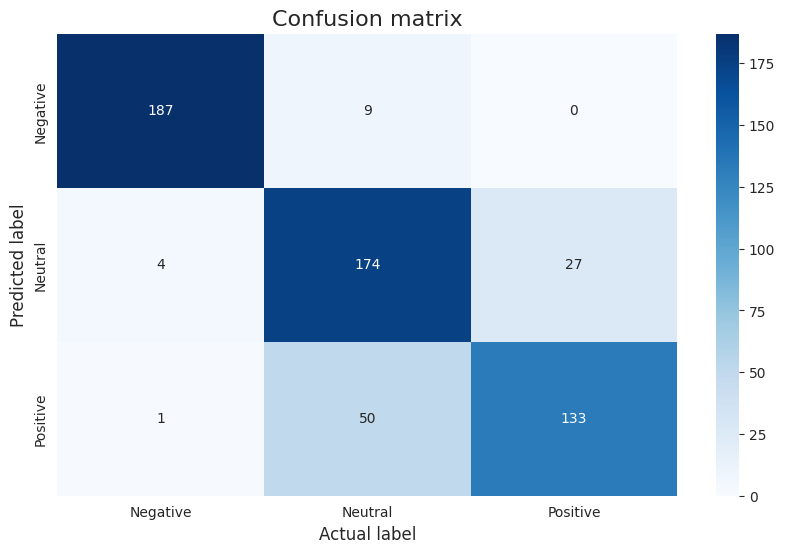

In [ ]:
print("Classification Report:\n----------------------\n", sv)

cm = confusion_matrix(y_test, svm_prediction)


# plot confusion matrix
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nby = classification_report(y_test, nb_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

    Negative       0.69      0.95      0.80       194
     Neutral       0.76      0.55      0.64       204
    Positive       0.78      0.71      0.74       189

    accuracy                           0.74       587
   macro avg       0.74      0.74      0.73       587
weighted avg       0.74      0.74      0.73       587



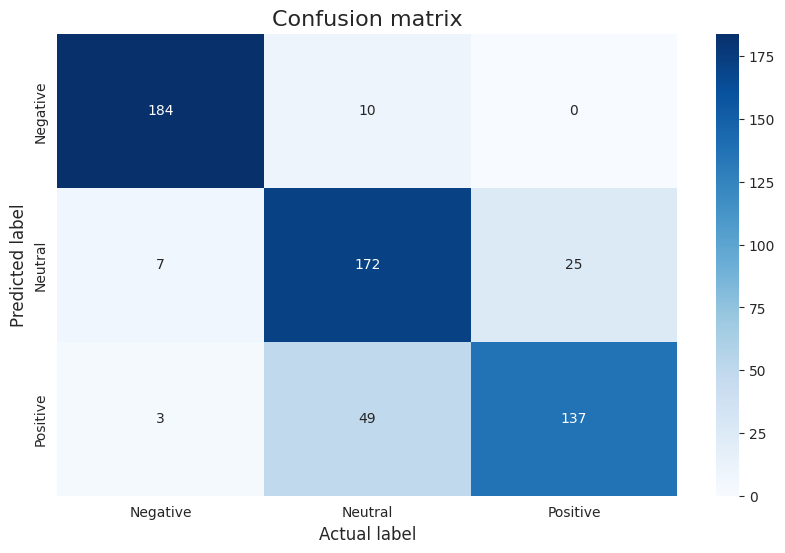

In [ ]:
print("Classification Report:\n----------------------\n", nby)

nby = confusion_matrix(y_test, nb_prediction)


# plot confusion matrix
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()